# Bike Sharing Demand

In [3]:
#importing the necessary libraries 
import os 

import pandas as pd
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt


In [3]:
#importing the csv file
os.chdir('C:\\Users\\Anugya\\Desktop\\Term 1\\ML1\\Mid Term Project\\Bike Sharing\\Dataset')
hours = pd.read_csv('hour.csv')

In [5]:
hours.head()

,instant,Start date1,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,temp_act,atemp,atemp_act,hum,hum_act,windspeed,windspeed_act,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,0,6,0,1,...,3.28,0.2879,3.01,0.81,81,0.0,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,...,2.34,0.2727,2.00,0.80,80,0.0,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,...,2.34,0.2727,2.00,0.80,80,0.0,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,...,3.28,0.2879,3.01,0.75,75,0.0,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,...,3.28,0.2879,3.01,0.75,75,0.0,0.0,0,1,1


In [4]:
#getting info about the dataset
print(hours.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
instant          17379 non-null int64
Start date1      17379 non-null object
season           17379 non-null int64
yr               17379 non-null int64
mnth             17379 non-null int64
hr               17379 non-null int64
holiday          17379 non-null int64
weekday          17379 non-null int64
workingday       17379 non-null int64
weathersit       17379 non-null int64
temp             17379 non-null float64
temp_act         17379 non-null float64
atemp            17379 non-null float64
atemp_act        17379 non-null float64
hum              17379 non-null float64
hum_act          17379 non-null int64
windspeed        17379 non-null float64
windspeed_act    17379 non-null float64
casual           17379 non-null int64
registered       17379 non-null int64
cnt              17379 non-null int64
dtypes: float64(7), int64(13), object(1)
memory usage: 2.8+ MB
None


In [8]:
hours.rename(columns = {'Start date1':'date',
                    'yr':'year',
                    'mnth':'month',
                    'hr':'hour',
                    'weathersit':'weather',
                    'hum':'humidity',
                    'cnt':'total_count' },inplace = True)

In [9]:
hours.date = pd.to_datetime(hours.date)#to convert date from object to date


In [5]:
hours.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,...,temp_act,atemp,atemp_act,humidity,hum_act,windspeed,windspeed_act,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,3.28,0.2879,3.01,0.81,81,0.0,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,2.34,0.2727,2.00,0.80,80,0.0,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,2.34,0.2727,2.00,0.80,80,0.0,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,3.28,0.2879,3.01,0.75,75,0.0,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,3.28,0.2879,3.01,0.75,75,0.0,0.0,0,1,1


In [10]:
table = pd.crosstab(hours.season,hours.total_count.sum())
table.index = ['Spring','Summer','Fall','Winter']

table

col_0,3292679
Spring,4242
Summer,4409
Fall,4496
Winter,4232


# Exploratory Data Analysis

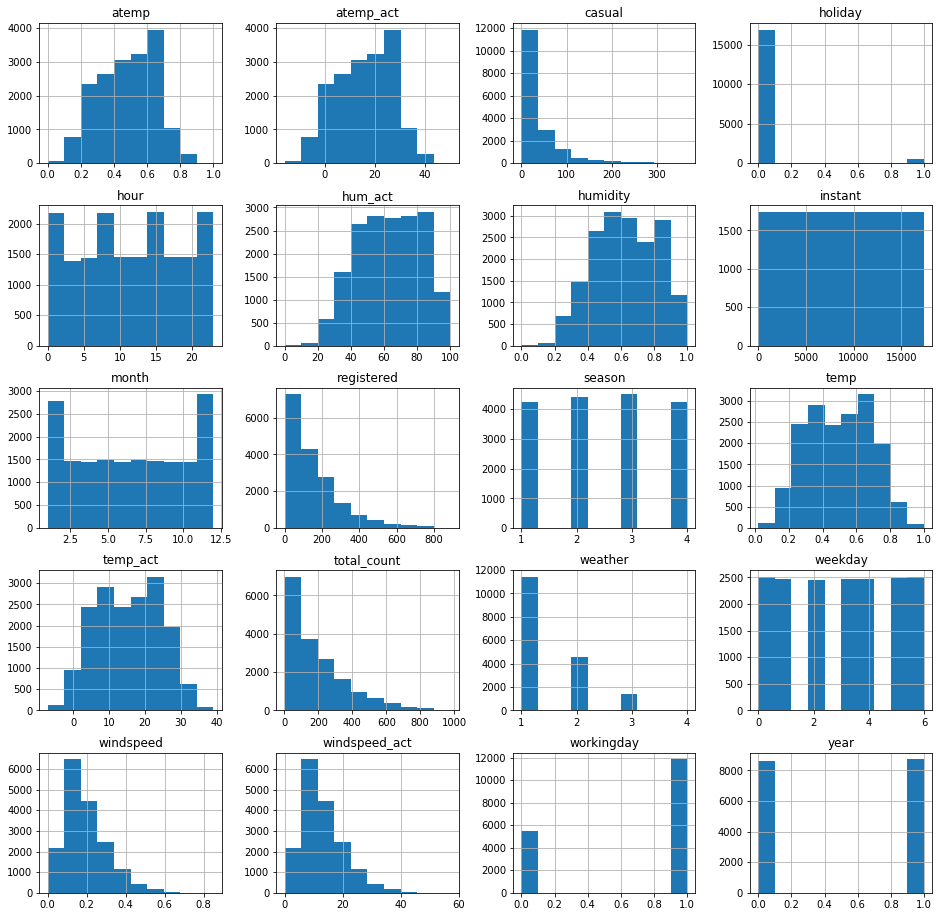

In [11]:
plt.rcParams['figure.figsize'] = (16,16)
hours.hist()
plt.show()

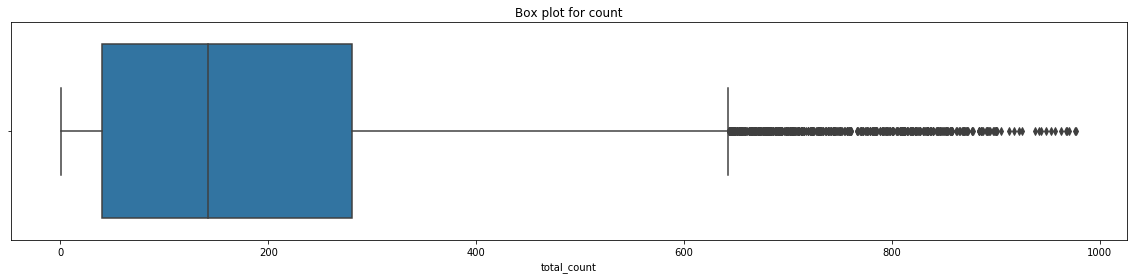

In [12]:
plt.figure(figsize=(20,4))
ax = sns.boxplot(x = 'total_count',data = hours)
ax.set_title('Box plot for count')
plt.show()

We can see a lot of outliers in our target variable "total_count", therefore we can say the target is not balanced.

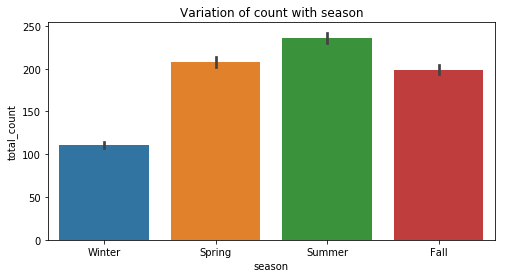

In [13]:
plt.figure(figsize=(8,4))
ax = sns.barplot(data=hours, x="season", y="total_count")
ax.set_title('Variation of count with season')

tick_val=[0,1, 2, 3]
tick_lab=['Winter', 'Spring', 'Summer', 'Fall']
plt.xticks(tick_val, tick_lab)
plt.show()


We can see the bike rental count is highest in the summer season followed by spring and fall and winter see low rental counts

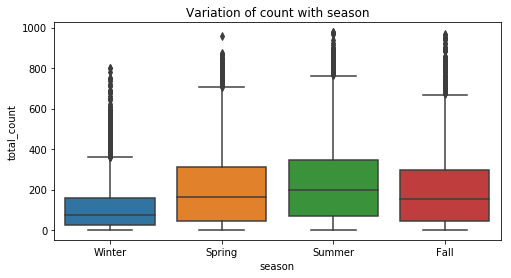

In [14]:
plt.figure(figsize=(8,4))
ax = sns.boxplot(data=hours, x="season", y="total_count")
ax.set_title('Variation of count with season')

tick_val=[0,1, 2, 3]
tick_lab=['Winter', 'Spring', 'Summer', 'Fall']
plt.xticks(tick_val, tick_lab)
plt.show()


We can see winter and fall season has a lot of outliers.

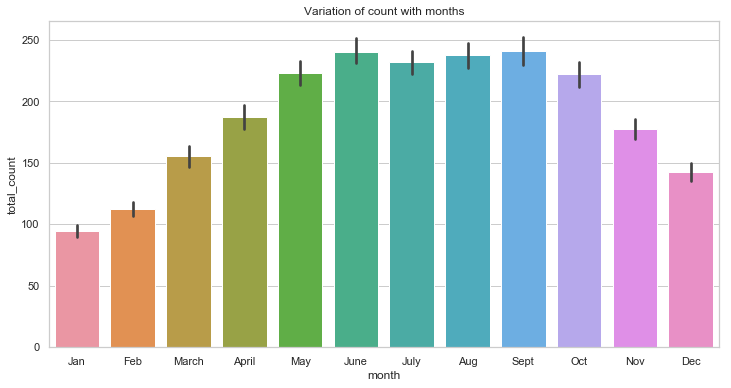

In [37]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='month', y='total_count', data=hours)
ax.set_title('Variation of count with months')
sns.set(style="whitegrid")

tick_val=[0,1 , 2, 3, 4 , 5 , 6 , 7 , 8 , 9 , 10 , 11]
tick_lab=['Jan','Feb','March','April','May','June','July','Aug','Sept','Oct','Nov','Dec']
plt.xticks(tick_val, tick_lab)
plt.show()

From above figure we can infer that rental counts are highest in the month of June, July and August which are summer months in Washington DC,similarly fall months (Sept, Oct and Nov) have second highest bike rental. So the variation of rental bikes with month is similar to the seasons. 

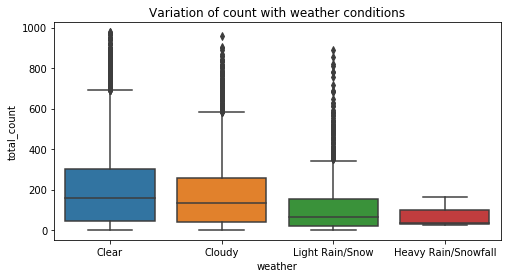

In [6]:
plt.figure(figsize=(8,4))
ax = sns.boxplot(data=hours, x="weather", y="total_count")
ax.set_title('Variation of count with weather conditions')

tick_val=[0,1, 2, 3]
tick_lab=['Clear', 'Cloudy', 'Light Rain/Snow','Heavy Rain/Snowfall']
plt.xticks(tick_val, tick_lab)
plt.show()

If we look at the weather conditons, Clear weather has the highest rental count as expected and their are a lot of outliers for cloudy and light rain/snow weather conditions.

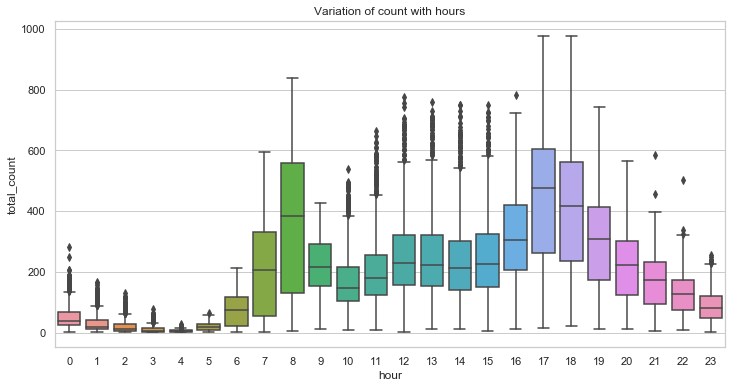

In [42]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x='hour', y='total_count', data=hours)
ax.set_title('Variation of count with hours')
sns.set(style="whitegrid")

This box plot of variation of bike rental count with hours shows the average number of bikes duirng peak hours like in the morning (7am - 9 am) and in the evening (5pm - 7 pm) is around 400 bikes.

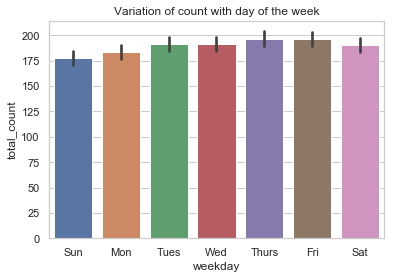

In [25]:
ax = sns.barplot(x="weekday",y='total_count',data=hours)
ax.set_title('Variation of count with day of the week')
tick_val=[0, 1, 2, 3, 4, 5, 6]
tick_lab=['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']
plt.xticks(tick_val, tick_lab)
plt.show()

The bike rental count with day of the week doesnt vary a lot, it is almost constant for all days.

We will now look at the variation of rental bikes separately for **registered** and **casual** users.

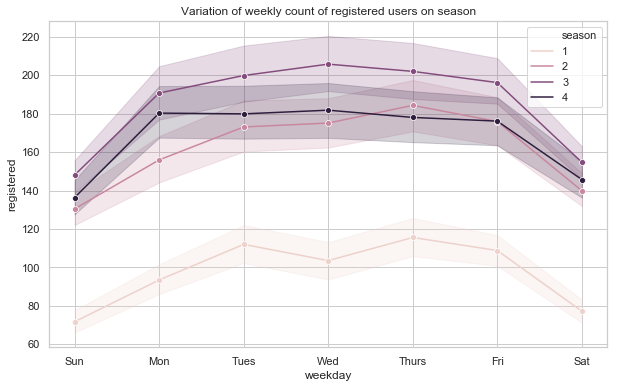

In [16]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='weekday', y='registered', data=hours, hue='season',marker = 'o')
ax.set_title('Variation of weekly count of registered users on season')
sns.set(style="whitegrid")
tick_val=[0, 1, 2, 3, 4, 5, 6]
tick_lab=['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']
plt.xticks(tick_val, tick_lab)
plt.show()


For registered users, the count of rental bikes is more during weekdays showing the registered users follow a regular riding pattern.

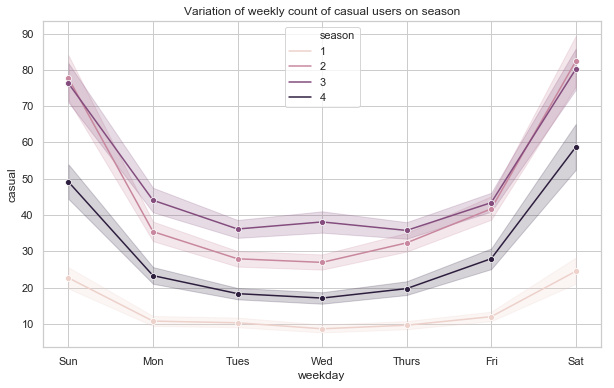

In [20]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='weekday', y='casual', data=hours, hue='season',marker = 'o')
ax.set_title('Variation of weekly count of casual users on season')
sns.set(style="whitegrid")
tick_val=[0, 1, 2, 3, 4, 5, 6]
tick_lab=['Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat']
plt.xticks(tick_val, tick_lab)
plt.show()


The variation of rental counts with day of week for casual users show that the count is high on weekends whereas it is low and almost same for all the weekdays. This means casual riders may have a good composition of tourists who use bikes for local sightseeing and recreation activities.

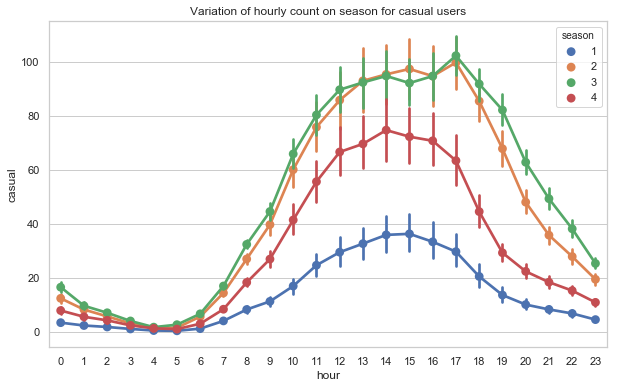

In [24]:
plt.figure(figsize=(10,6))
ax = sns.pointplot(x='hour', y='casual', data=hours, hue='season')
ax.set_title('Variation of hourly count on season for casual users')
sns.set(style="whitegrid")

Hourly count for casual users show that they are most active during the afternoon hours (11am - 6 pm), so they mostly use bike rentals for recreation purposes. 

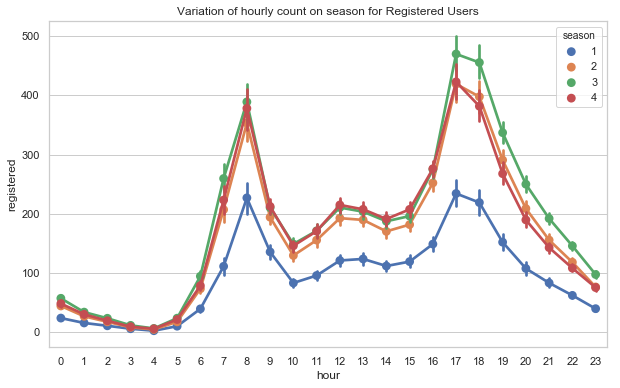

In [23]:
plt.figure(figsize=(10,6))
ax = sns.pointplot(x='hour', y='registered', data=hours, hue='season')
ax.set_title('Variation of hourly count on season for Registered Users')
sns.set(style="whitegrid")


Hourly count of bike rentals for registered users show that ridership pattern for registered users is mostly office-commuter oriented as the demand is high during peak morning hours (7 am - 9 am) and evening hours(5 pm - 7pm).

Variation of rental count with temperature for casual and registered users


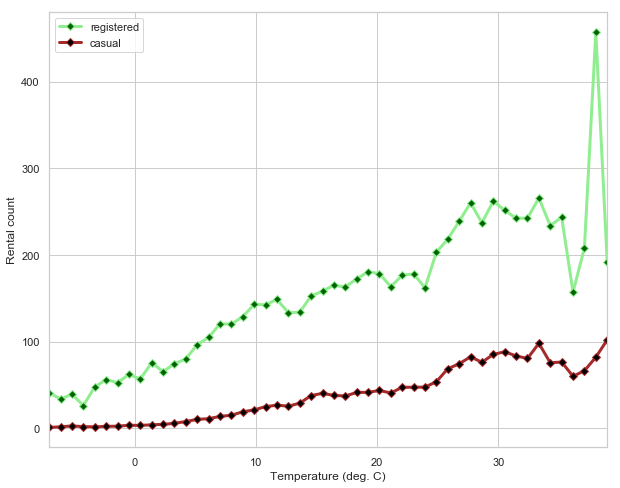

In [24]:
temp_reg = hours.groupby(['temp_act'])['registered'].mean()
temp_cas = hours.groupby(['temp_act'])['casual'].mean()

fig,axes = plt.subplots(figsize=(10, 8))

temp_reg.plot(kind = 'line', marker='D', markerfacecolor='darkgreen', markersize=5, color='lightgreen', linewidth=3)
temp_cas.plot(kind = 'line', marker='D', markerfacecolor='black', markersize=5, color='brown', linewidth=3)
print('Variation of rental count with temperature for casual and registered users')
plt.legend(loc='upper left')
plt.xlabel('Temperature (deg. C)')
plt.ylabel('Rental count')
plt.show()

If we look at the variation of bike counts with temperature, people like to ride more in a fairly hot temperature(ride count is high for temperatures beyond 30 deg Celsius, however as the temperature becomes extremely high ridership drops which is expected.

Variation of rental count with humidity for casual and registered users


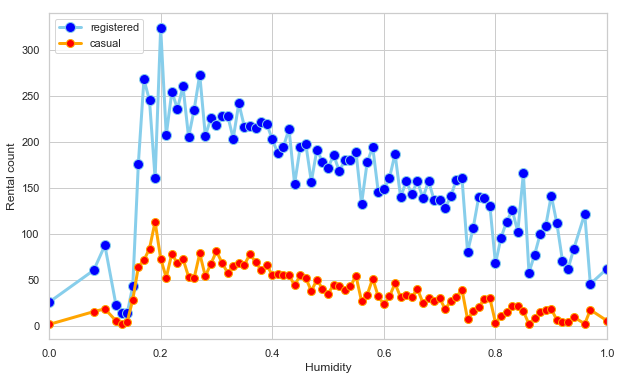

In [25]:
hum_reg = hours.groupby(['humidity'])['registered'].mean()
hum_cas = hours.groupby(['humidity'])['casual'].mean()
fig,axes = plt.subplots(figsize=(10, 6))


hum_reg.plot(kind = 'line', marker='o', markerfacecolor='blue', markersize=10, color='skyblue', linewidth=3)
hum_cas.plot(kind = 'line',color = 'orange',marker = 'o', markerfacecolor='red', markersize=8,linewidth=3)
print('Variation of rental count with humidity for casual and registered users')

plt.legend(loc='upper left')
plt.xlabel('Humidity')
plt.ylabel('Rental count')
plt.show()

We can see from above that bike rental is more when humidity is less which is expected as humidity increases due to more perspiration people would avoid riding bikes.

Variation of bike rental count with windspeed


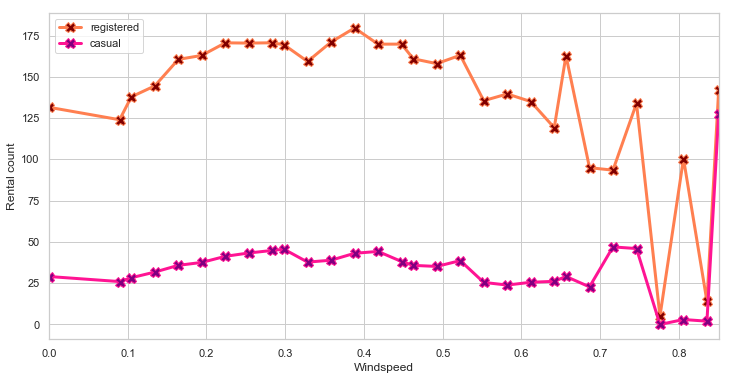

In [26]:
windspeed_reg = hours.groupby(['windspeed'])['registered'].mean()
windspeed_cas = hours.groupby(['windspeed'])['casual'].mean()
fig,axes = plt.subplots(figsize=(12, 6))

windspeed_reg.plot(kind = 'line', marker='X', markerfacecolor='maroon', markersize= 10, color='coral', linewidth=3)
windspeed_cas.plot(kind = 'line', marker='X', markerfacecolor='purple', markersize= 10, color='deeppink', linewidth=3)
print('Variation of bike rental count with windspeed')

plt.legend(loc='upper left')
plt.xlabel('Windspeed')
plt.ylabel('Rental count')
plt.show()

From the above graph we can see people prefer moderate windspeed as bike rental counts are highest for low windspeed.

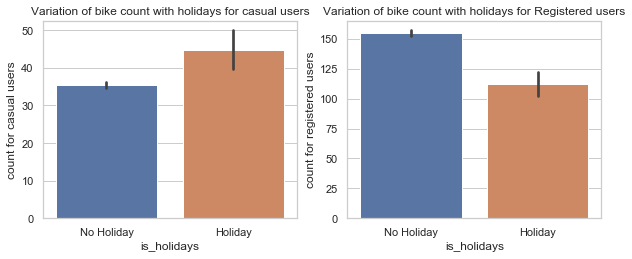

In [52]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)
ax = sns.barplot(x="holiday",y='casual',data=hours)
plt.xlabel("is_holidays")
plt.ylabel("count for casual users")
ax.set_title('Variation of bike count with holidays for casual users')

tick_val=[0,1]
tick_lab=['No Holiday','Holiday']
plt.xticks(tick_val, tick_lab)

plt.subplot(2, 2, 2)
ax = sns.barplot(x="holiday",y='registered',data=hours)
plt.xlabel("is_holidays")
plt.ylabel("count for registered users")
ax.set_title('Variation of bike count with holidays for Registered users')

tick_val=[0,1]
tick_lab=['No Holiday','Holiday']
plt.xticks(tick_val, tick_lab)
plt.show()

Casual users tend to ride more bikes during holidays.

# Conclusion

1. Casual and registered users have a different pattern of riding bike rentals.
2. Registered users are more active during weekdays and casual users are more active using weekends.
3. Registered users are mostly office commuter whereas casual users consists more of tourists and people indulging in recreation activities.
4. Both casual and registered users prefer warm climate with favourable humidity and windspeed conditions for riding bikes.
5. Summers are preferred more as compared to any other season and clear weather conditions see more bike rentals.

# Observations from trip data

In [84]:
trip = pd.read_csv('C:\\Users\\Anugya\\Desktop\\Term 1\\ML1\\Mid Term Project\\Bike Sharing\\Dataset\\2011-capitalbikeshare-tripdata_final1.csv')

In [85]:
trip.head()

,Duration (in secs),Duration,Start date,Start time,End date,End time,Start station number,Start station,LATITUDE,LONGITUDE,End station number,End station,Path Id,LATITUDE.1,LONGITUDE.1,Bike number,Member,temp_act,Season
0,3548,59,01-01-2011,00:01:00,01-01-2011,01:00:00,31620,5th & F St NW,38.897222,-77.019347,31620,5th & F St NW,5th & F St NW_5th & F St NW,38.897222,-77.019347,W00247,Member,3.28,Winter
1,346,6,01-01-2011,00:02:00,01-01-2011,00:08:00,31105,14th & Harvard St NW,38.926800,-77.032200,31101,14th & V St NW,14th & Harvard St NW_14th & V St NW,38.917931,-77.032112,W00675,Casual,3.28,Winter
2,562,9,01-01-2011,00:06:00,01-01-2011,00:15:00,31400,Georgia & New Hampshire Ave NW,38.936043,-77.024649,31104,Adams Mill & Columbia Rd NW,Georgia & New Hampshire Ave NW_Adams Mill & Co...,38.922925,-77.042581,W00357,Member,3.28,Winter
3,434,7,01-01-2011,00:09:00,01-01-2011,00:16:00,31111,10th & U St NW,38.917200,-77.025900,31503,Florida Ave & R St NW,10th & U St NW_Florida Ave & R St NW,38.912600,-77.013500,W00970,Member,3.28,Winter
4,233,4,01-01-2011,00:28:00,01-01-2011,00:32:00,31104,Adams Mill & Columbia Rd NW,38.922925,-77.042581,31106,Calvert & Biltmore St NW,Adams Mill & Columbia Rd NW_Calvert & Biltmore...,38.923203,-77.047637,W00346,Casual,3.28,Winter


## Ride duration box plot

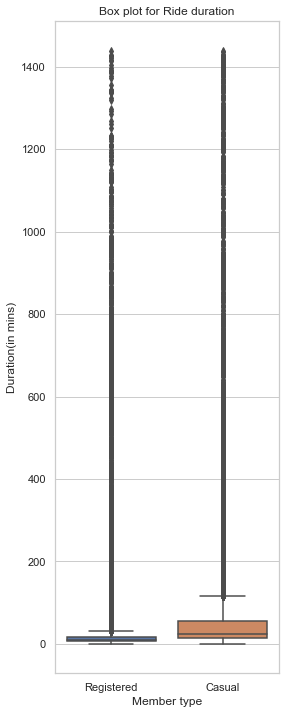

In [63]:
plt.figure(figsize=(4,12))
ax = sns.boxplot(data = trip, x = 'Member type', y = 'Duration(in mins)')
ax.set_title('Box plot for Ride duration')
sns.set(style="whitegrid")
tick_val=[0,1]
tick_lab=['Registered', 'Casual']
plt.xticks(tick_val, tick_lab)
plt.show()


## Modelling

In [9]:
# importing the required library and reading the file
import statsmodels.api as stm
hour=pd.read_csv("C:\\Users\\Aiswarya\\Downloads\\hour.csv")

In [5]:
#Select 0.7*17379 random index numbers from the dataset as the training data
np.random.seed(0)
train = np.random.choice(hour.index, round(0.7*17379), replace=False)
train.sort()
train

array([    0,     1,     4, ..., 17375, 17377, 17378], dtype=int64)

In [6]:
#specifying the variables under consideration and the target variable for the train data
X_train = hour.loc[train, ['season','mnth','hr','weekday','hum','windspeed','weathersit','temp']]
y_train = hour.loc[train, 'cnt']

In [7]:
#Get the indices for the test data
test = []
for i in list(hour.index):
    if i not in train:
        test.append(i)
        
test = np.array(test)
test.sort()
test

array([    2,     3,    10, ..., 17372, 17374, 17376])

In [8]:
##specifying the variables under consideration and the target variable for the test data
X_test = hour.loc[train, ['season','mnth','hr','weekday','hum','windspeed','weathersit','temp']]
y_test = hour.loc[train, 'cnt']

In [10]:
#training the model, adding constant term to the model
X_train = stm.add_constant(X_train)  
X_train.head()

,const,season,mnth,hr,weekday,hum,windspeed,weathersit,temp
0,1.0,1,1,0,6,0.81,0.0000,1,0.24
1,1.0,1,1,1,6,0.80,0.0000,1,0.22
4,1.0,1,1,4,6,0.75,0.0000,1,0.24
5,1.0,1,1,5,6,0.75,0.0896,2,0.24
6,1.0,1,1,6,6,0.80,0.0000,1,0.22


In [11]:
#Ordinary Least Squared (OLS) Regression,fitting the model
model = stm.OLS(y_train,X_train).fit()  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     792.0
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        22:26:29   Log-Likelihood:                -77963.
No. Observations:               12165   AIC:                         1.559e+05
Df Residuals:                   12156   BIC:                         1.560e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6237      7.997      5.455      0.000      27.948      59.300
season        19.7108      2.239      8.802      0.000      15.321      24.100
mnth          -0.2921      0.699     -0.418      0.676      -1.661       1.077
hr             7.3731      0.204     36.104      0.000       6.973       7.773
weekday        1.5952      0.665      2.399      0.016       0.292       2.899
hum         -228.2494      8.497    -26.863      0.000    -244.905    -211.594
windspeed     14.0920     11.589      1.216      0.224      -8.625      36.809
weathersit     0.2904      2.349      0.124      0.902      -4.313       4.894
temp         299.6254      7.475     40.085      0.000     284.974     314.277
==============================================================================
Omnibus:                     2905.950   Durbin-Watson:                   0.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6521.931
Skew:                           1.364   Prob(JB):                         0.00
Kurtosis:                       5.329   Cond. No.                         150.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R^2 = 0.343 ,is a measure of the goodness of fit of the model.

34.3% of **variation** of the variable count of rentals is explained by the predictor variables using this regression model, which is quite low hence it is not a good model to fit.

